In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV

**Data Extraction and Set Up**

In [187]:
train = pd.read_csv('sfo_weather_encoded_train.csv')
test = pd.read_csv('sfo_weather_encoded_test.csv')

In [188]:
train

,Precip,Air_Temp_Max,Air_Temp_Min,DepDelay,DepDel15,Distance,DepDelayBinary,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,...,DepTimeBlk_2300-2359,DistanceGroup_2,DistanceGroup_3,DistanceGroup_4,DistanceGroup_6,DistanceGroup_7,DistanceGroup_8,DistanceGroup_9,DistanceGroup_10,DistanceGroup_11
0,0.12,57,44,-15.0,0.0,679.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.00,69,53,-5.0,0.0,414.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.00,68,53,-4.0,0.0,372.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.12,57,45,-8.0,0.0,599.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.06,65,50,-5.0,0.0,414.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51525,0.03,67,51,-9.0,0.0,550.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
51526,0.00,73,55,-9.0,0.0,679.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
51527,0.01,70,54,95.0,1.0,447.0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
51528,0.10,56,44,15.0,1.0,372.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [189]:
test

,Precip,Air_Temp_Max,Air_Temp_Min,DepDelay,DepDel15,Distance,DepDelayBinary,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,...,DepTimeBlk_2300-2359,DistanceGroup_2,DistanceGroup_3,DistanceGroup_4,DistanceGroup_6,DistanceGroup_7,DistanceGroup_8,DistanceGroup_9,DistanceGroup_10,DistanceGroup_11
0,0.03,68,51,-4.0,0.0,337.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.07,64,48,5.0,0.0,414.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.00,72,55,-10.0,0.0,1464.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.01,67,51,-7.0,0.0,451.0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0.09,56,45,16.0,1.0,599.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22080,0.11,62,48,-3.0,0.0,2338.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22081,0.17,58,46,6.0,0.0,451.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22082,0.01,69,52,3.0,0.0,651.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
22083,0.00,72,54,144.0,1.0,447.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [190]:
X_train = train.drop(columns=['DepDelay', 'DepDel15', 'DepDelayBinary'])
X_test = test.drop(columns=['DepDelay', 'DepDel15', 'DepDelayBinary'])

y_train_reg = train.loc[:, 'DepDelay']
y_train_class = train.loc[:, 'DepDelayBinary']
y_train_delay15 = train.loc[:, 'DepDel15']

y_test_reg = test.loc[:, 'DepDelay']
y_test_class = test.loc[:, 'DepDelayBinary']
y_test_delay15 = test.loc[:, 'DepDel15']

In [191]:
X_train

,Precip,Air_Temp_Max,Air_Temp_Min,Distance,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,...,DepTimeBlk_2300-2359,DistanceGroup_2,DistanceGroup_3,DistanceGroup_4,DistanceGroup_6,DistanceGroup_7,DistanceGroup_8,DistanceGroup_9,DistanceGroup_10,DistanceGroup_11
0,0.12,57,44,679.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,69,53,414.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0.00,68,53,372.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.12,57,45,599.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.06,65,50,414.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51525,0.03,67,51,550.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
51526,0.00,73,55,679.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
51527,0.01,70,54,447.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
51528,0.10,56,44,372.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [192]:
y_train_reg

0       -15.0
1        -5.0
2        -4.0
3        -8.0
4        -5.0
         ... 
51525    -9.0
51526    -9.0
51527    95.0
51528    15.0
51529    -4.0
Name: DepDelay, Length: 51530, dtype: float64

In [193]:
y_train_class

0        0
1        0
2        0
3        0
4        0
        ..
51525    0
51526    0
51527    1
51528    1
51529    0
Name: DepDelayBinary, Length: 51530, dtype: int64

**Baseline Model on Delay**

In [194]:
most_common_label = y_train_class.value_counts().argmax()
print('Most Common Label:', most_common_label)
baseline_acc = (y_train_class == most_common_label).mean()
print(f'Baseline Test Accuracy: {baseline_acc:.4f}')

Most Common Label: 0
Baseline Test Accuracy: 0.6371


**Baseline Model on Delay of 15 minutes or more**

In [195]:
most_common_label_delay15 = y_train_delay15.value_counts().argmax()
baseline_acc_delay15 = (y_train_delay15 == most_common_label_delay15).mean()
print(f'Baseline Test Accuracy: {baseline_acc_delay15:.4f}')

Baseline Test Accuracy: 0.8259


# CART Models

## Decision Tree Regressor

**Predicting How Early or Late a Flight is**

In [196]:
dtr = DecisionTreeRegressor(min_samples_leaf=5, 
                             ccp_alpha=0.001,
                             random_state = 88)

dtr = dtr.fit(X_train, y_train_reg)

In [197]:
y_pred_reg = dtr.predict(X_test)
pd.DataFrame(y_pred_reg, y_test_reg)

,0
DepDelay,
-4.0,-3.800000
5.0,20.000000
-10.0,0.800000
-7.0,21.000000
16.0,1.400000
...,...
-3.0,-3.066667
6.0,-4.611940
3.0,16.625000


In [198]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [199]:
# OSR2 value
print('OSR2:', OSR2(dtr, X_test, y_test_reg, y_train_reg))

OSR2: -0.11864908730633172


**Predicting if a Flight is Late**

In [200]:
y_pred_reg_binary = [1 if x > 0 else 0 for x in y_pred_reg]

In [201]:
cm = confusion_matrix(y_test_class, y_pred_reg_binary)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[6849 7255]
 [2582 5399]]
Accuracy is: 0.5546
TPR is: 0.6765
FPR is: 0.5144
PRE is: 0.4267


**Predicting if a Flight is Late by more than 15 minutes**

In [202]:
y_pred_reg_binary15 = [1 if x > 15 else 0 for x in y_pred_reg]

In [203]:
cm = confusion_matrix(y_test_delay15, y_pred_reg_binary15)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[14514  3719]
 [ 2553  1299]]
Accuracy is: 0.7160
TPR is: 0.3372
FPR is: 0.2040
PRE is: 0.2589


## Decision Tree Classifier

**Predicting if a Flight is Late**

In [204]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha=0.0001,
                             random_state = 88)

dtc = dtc.fit(X_train, y_train_class)

In [205]:
y_pred_class = dtc.predict(X_test)

Node count = 281


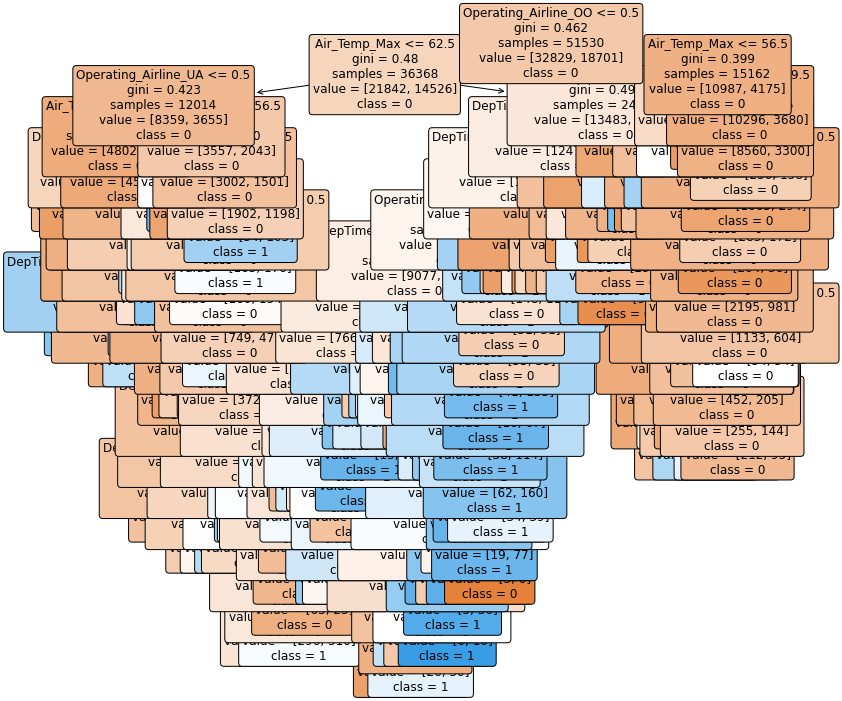

In [206]:
print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(12,12))
plot_tree(dtc, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) 
plt.show()

In [207]:
cm = confusion_matrix(y_test_class, y_pred_class)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[12294  1810]
 [ 5520  2461]]
Accuracy is: 0.6681
TPR is: 0.3084
FPR is: 0.1283
PRE is: 0.5762


**Predicting if a Flight is Late by more than 15 minutes**

In [208]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha=0.0001,
                             random_state = 88)

dtc = dtc.fit(X_train, y_train_delay15)

In [209]:
y_pred_delay15 = dtc.predict(X_test)

In [210]:
cm = confusion_matrix(y_test_delay15, y_pred_delay15)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[18191    42]
 [ 3797    55]]
Accuracy is: 0.8262
TPR is: 0.0143
FPR is: 0.0023
PRE is: 0.5670


## Decision Tree Classifier with CV

**Predicting if a Flight is Late**

In [232]:
grid_values = {'ccp_alpha': np.linspace(0, 0.0001, 51),
               'min_samples_leaf': [5],
               'random_state': [88]}

dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', verbose=2) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X_train, y_train_class)

Fitting 5 folds for each of 51 candidates, totalling 255 fits
[CV] ccp_alpha=0.0, min_samples_leaf=5, random_state=88 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ccp_alpha=0.0, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=0.0, min_samples_leaf=5, random_state=88 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  ccp_alpha=0.0, min_samples_leaf=5, random_state=88, total=   0.3s
[CV] ccp_alpha=0.0, min_samples_leaf=5, random_state=88 ..............
[CV]  ccp_alpha=0.0, min_samples_leaf=5, random_state=88, total=   0.3s
[CV] ccp_alpha=0.0, min_samples_leaf=5, random_state=88 ..............
[CV]  ccp_alpha=0.0, min_samples_leaf=5, random_state=88, total=   0.3s
[CV] ccp_alpha=0.0, min_samples_leaf=5, random_state=88 ..............
[CV]  ccp_alpha=0.0, min_samples_leaf=5, random_state=88, total=   0.3s
[CV] ccp_alpha=2e-06, min_samples_leaf=5, random_state=88 ............
[CV]  ccp_alpha=2e-06, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2e-06, min_samples_leaf=5, random_state=88 ............
[CV]  ccp_alpha=2e-06, min_samples_leaf=5, random_state=88, total=   0.3s
[CV] ccp_alpha=2e-06, min_samples_leaf=5, random_state=88 ............
[CV]  ccp_alpha=2e-06, min_samples_leaf=5, random_state=88, total=   0.3s
[CV] ccp_alpha=2e-06, min_samples_leaf=5, random_state=88 ......

[CV]  ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.4e-05, min_samples_leaf=5

[CV]  ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.6e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.6e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.6e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.6e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.6e-05, min_samples_leaf=5

[CV]  ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88 
[CV]  ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88 
[CV]  ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88 
[CV]  ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88 
[CV]  ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=6.8e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=6.8e-05, min_sam

[CV]  ccp_alpha=8.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=8.999999999999999e-05, min_samples_leaf=5, random_state=88 
[CV]  ccp_alpha=8.999999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_a

[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed:  1.6min finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-06, 4.0e-06, 6.0e-06, 8.0e-06, 1.0e-05, 1.2e-05,
       1.4e-05, 1.6e-05, 1.8e-05, 2.0e-05, 2.2e-05, 2.4e-05, 2.6e-05,
       2.8e-05, 3.0e-05, 3.2e-05, 3.4e-05, 3.6e-05, 3.8e-05, 4.0e-05,
       4.2e-05, 4.4e-05, 4.6e-05, 4.8e-05, 5.0e-05, 5.2e-05, 5.4e-05,
       5.6e-05, 5.8e-05, 6.0e-05, 6.2e-05, 6.4e-05, 6.6e-05, 6.8e-05,
       7.0e-05, 7.2e-05, 7.4e-05, 7.6e-05, 7.8e-05, 8.0e-05, 8.2e-05,
       8.4e-05, 8.6e-05, 8.8e-05, 9.0e-05, 9.2e-05, 9.4e-05, 9.6e-05,
       9.8e-05, 1.0e-04]),
                         'min_samples_leaf': [5], 'random_state': [88]},
             scoring='accuracy', verbose=2)

In [233]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc})

,ccp alpha,Validation Accuracy
0,0,0.641471
1,2e-06,0.641005
2,4e-06,0.641219
3,6e-06,0.641956
4,8e-06,0.641995
5,1e-05,0.643373
6,1.2e-05,0.643509
7,1.4e-05,0.644246
8,1.6e-05,0.644576
9,1.8e-05,0.646381


In [234]:
y_pred = dtc_cv_acc.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test_class, y_pred)

print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[12322  1782]
 [ 5459  2522]]
Accuracy is: 0.6721
TPR is: 0.3160
FPR is: 0.1263
PRE is: 0.5860


**Predicting if a Flight is Late by more than 15 minutes**

In [239]:
grid_values = {'ccp_alpha': np.linspace(0, 0.0001, 51),
               'min_samples_leaf': [5],
               'random_state': [88]}

dtc = DecisionTreeClassifier()
dtc_cv_acc_delay15 = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', verbose=2) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc_delay15.fit(X_train, y_train_delay15)

Fitting 5 folds for each of 51 candidates, totalling 255 fits
[CV] ccp_alpha=0.0, min_samples_leaf=5, random_state=88 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ccp_alpha=0.0, min_samples_leaf=5, random_state=88, total=   0.6s
[CV] ccp_alpha=0.0, min_samples_leaf=5, random_state=88 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  ccp_alpha=0.0, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=0.0, min_samples_leaf=5, random_state=88 ..............
[CV]  ccp_alpha=0.0, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=0.0, min_samples_leaf=5, random_state=88 ..............
[CV]  ccp_alpha=0.0, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=0.0, min_samples_leaf=5, random_state=88 ..............
[CV]  ccp_alpha=0.0, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2e-06, min_samples_leaf=5, random_state=88 ............
[CV]  ccp_alpha=2e-06, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2e-06, min_samples_leaf=5, random_state=88 ............
[CV]  ccp_alpha=2e-06, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2e-06, min_samples_leaf=5, random_state=88 ............
[CV]  ccp_alpha=2e-06, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2e-06, min_samples_leaf=5, random_state=88 ......

[CV]  ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.2e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=2.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=2.4e-05, min_samples_leaf=5

[CV]  ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.4e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.6e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.6e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.6e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=4.6e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=4.6e-05, min_samples_leaf=5

[CV]  ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88 
[CV]  ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88 
[CV]  ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88 
[CV]  ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88 
[CV]  ccp_alpha=6.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=6.8e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=6.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=6.8e-05, min_sam

[CV]  ccp_alpha=8.599999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88, total=   0.4s
[CV] ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88, total=   0.5s
[CV] ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88 ..........
[CV]  ccp_alpha=8.8e-05, min_samples_leaf=5, random_state=88, total=   0.5s
[CV] ccp_alpha=8.999999999999999e-05, min_samples_leaf=5, random_state=88 
[CV]  ccp_alpha=8.999999999999999e-05, min_samples_leaf=5, random_state=88, total=   0.5s
[CV] ccp_a

[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed:  1.8min finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-06, 4.0e-06, 6.0e-06, 8.0e-06, 1.0e-05, 1.2e-05,
       1.4e-05, 1.6e-05, 1.8e-05, 2.0e-05, 2.2e-05, 2.4e-05, 2.6e-05,
       2.8e-05, 3.0e-05, 3.2e-05, 3.4e-05, 3.6e-05, 3.8e-05, 4.0e-05,
       4.2e-05, 4.4e-05, 4.6e-05, 4.8e-05, 5.0e-05, 5.2e-05, 5.4e-05,
       5.6e-05, 5.8e-05, 6.0e-05, 6.2e-05, 6.4e-05, 6.6e-05, 6.8e-05,
       7.0e-05, 7.2e-05, 7.4e-05, 7.6e-05, 7.8e-05, 8.0e-05, 8.2e-05,
       8.4e-05, 8.6e-05, 8.8e-05, 9.0e-05, 9.2e-05, 9.4e-05, 9.6e-05,
       9.8e-05, 1.0e-04]),
                         'min_samples_leaf': [5], 'random_state': [88]},
             scoring='accuracy', verbose=2)

In [240]:
acc = dtc_cv_acc_delay15.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc_delay15.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc})

,ccp alpha,Validation Accuracy
0,0,0.794236
1,2e-06,0.793693
2,4e-06,0.794023
3,6e-06,0.794605
4,8e-06,0.794722
5,1e-05,0.795401
6,1.2e-05,0.795731
7,1.4e-05,0.796293
8,1.6e-05,0.797070
9,1.8e-05,0.798700


In [241]:
y_pred = dtc_cv_acc_delay15.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test_delay15, y_pred)

print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[18191    42]
 [ 3797    55]]
Accuracy is: 0.8262
TPR is: 0.0143
FPR is: 0.0023
PRE is: 0.5670


## Linear Discriminant Analysis (LDA)

**Predicting if a Flight is Late**

In [214]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train_class)

LinearDiscriminantAnalysis()

In [215]:
y_pred_lda = lda.predict(X_test)

In [216]:
cm = confusion_matrix(y_test_class, y_pred_lda)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[12582  1522]
 [ 5903  2078]]
Accuracy is: 0.6638
TPR is: 0.2604
FPR is: 0.1079
PRE is: 0.5772


**Predicting if a Flight is Late by more than 15 minutes**

In [217]:
lda_delay15 = LinearDiscriminantAnalysis()
lda_delay15.fit(X_train, y_train_delay15)

LinearDiscriminantAnalysis()

In [218]:
y_pred_lda_delay15 = lda_delay15.predict(X_test)

In [219]:
cm = confusion_matrix(y_test_delay15, y_pred_lda_delay15)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[18232     1]
 [ 3852     0]]
Accuracy is: 0.8255
TPR is: 0.0000
FPR is: 0.0001
PRE is: 0.0000


## Bootstrap

In [245]:
def bootstrap_validation(X_test, y_test, model, sample=100, random_state=88):

    n_sample = sample
    output_dict = {}

    output_dict['Accuracy'] = []
    output_dict['TPR'] = []
    output_dict['FPR'] = []
    output_dict['PRE'] = []
        
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(X_test.index, len(X_test.index), replace=True)
        
        bs_data = X_test.loc[bs_index]
        bs_label = y_test.loc[bs_index]

        model_pred = model.predict(bs_data)
        cm = confusion_matrix(bs_label, model_pred)
        tn, fp, fn, tp = cm.ravel()
        output_dict['Accuracy'].append((cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel()))
        output_dict['TPR'].append(tp / (tp + fn))
        output_dict['FPR'].append(fp / (fp + tn))
        if tp+fp > 0:
            output_dict['PRE'].append(tp / (tp + fp))
        else:
            output_dict['PRE'].append(0)
            
    return output_dict

**LDA on DepDelay**

In [246]:
bs_output = bootstrap_validation(X_test, y_test_class, lda)

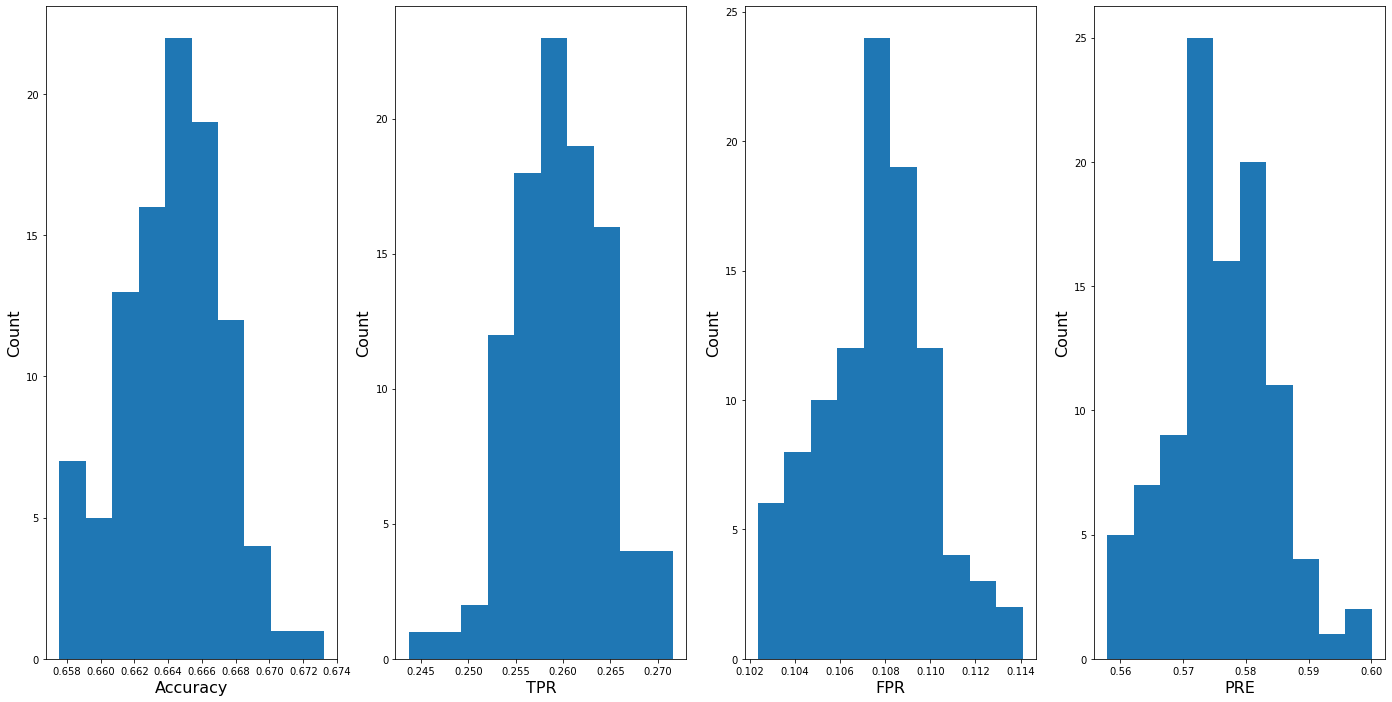

In [247]:
CI_acc = np.quantile(bs_output['Accuracy'],np.array([0.025,0.975]))
CI_TPR = np.quantile(bs_output['TPR'],np.array([0.025,0.975]))
CI_FPR = np.quantile(bs_output['FPR'],np.array([0.025,0.975]))
CI_PRE = np.quantile(bs_output['PRE'],np.array([0.025,0.975]))

fig, axs = plt.subplots(ncols=4, figsize=(24,12))
i = 0
for metric, metric_results in bs_output.items():
    axs[i].hist(metric_results, label = metric)
    axs[i].set_xlabel(metric,fontsize=16)
    axs[i].set_ylabel('Count',fontsize=16)
    i+=1
    
plt.show()

In [248]:
# Let's make a table for this 
bootstrap_data = {'Accuracy':[CI_acc[0],CI_acc[1]],'TPR':[CI_TPR[0],CI_TPR[1]],
                 'FPR':[CI_FPR[0],CI_FPR[1]],'PRE':[CI_PRE[0],CI_PRE[1]]}
bootstrap_table = pd.DataFrame(data = bootstrap_data, index = ['0.025 quantile','0.975 quantile']).transpose()
bootstrap_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
bootstrap_table

,0.025 quantile,0.975 quantile
Accuracy,0.658477,0.669175
TPR,0.251339,0.269488
FPR,0.102822,0.112260
PRE,0.560044,0.591792


**LDA on DepDelay15**

In [249]:
bs_output = bootstrap_validation(X_test, y_test_delay15, lda_delay15)

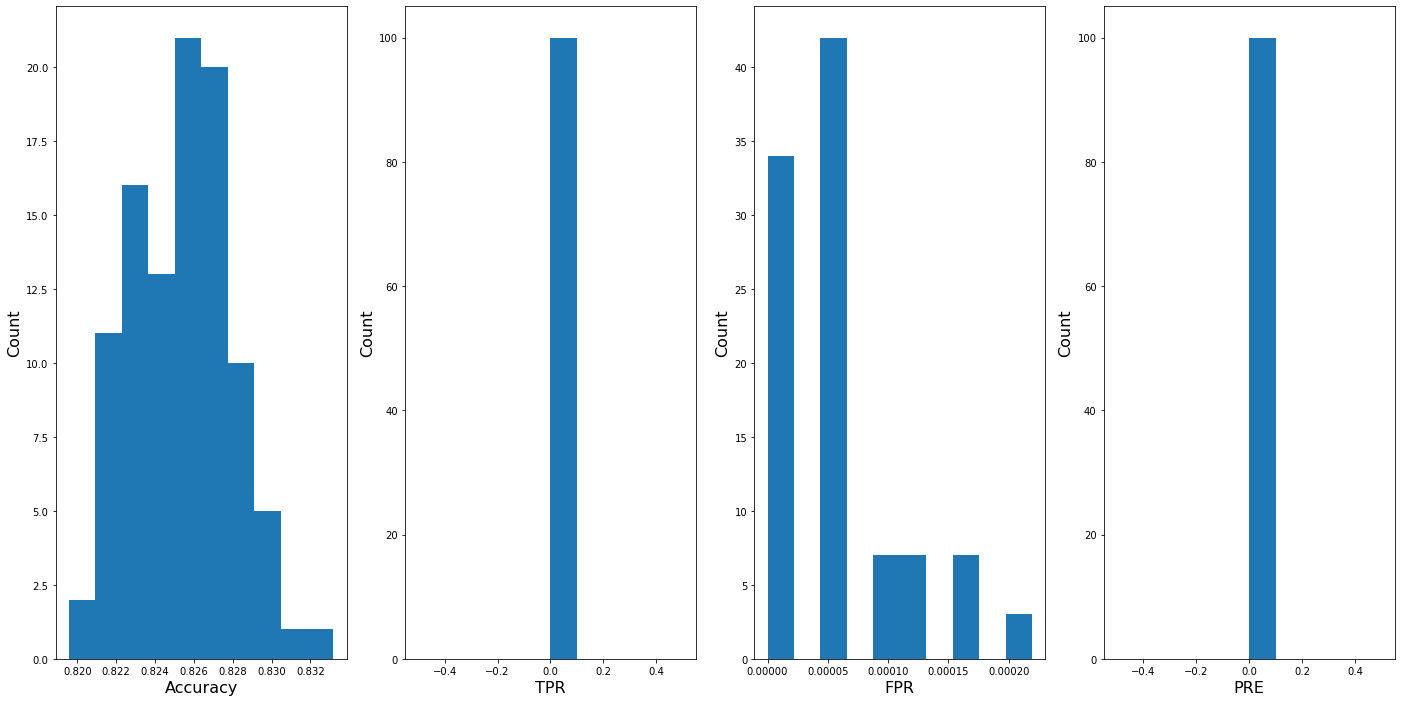

In [250]:
CI_acc = np.quantile(bs_output['Accuracy'],np.array([0.025,0.975]))
CI_TPR = np.quantile(bs_output['TPR'],np.array([0.025,0.975]))
CI_FPR = np.quantile(bs_output['FPR'],np.array([0.025,0.975]))
CI_PRE = np.quantile(bs_output['PRE'],np.array([0.025,0.975]))

fig, axs = plt.subplots(ncols=4, figsize=(24,12))
i = 0
for metric, metric_results in bs_output.items():
    axs[i].hist(metric_results, label = metric)
    axs[i].set_xlabel(metric,fontsize=16)
    axs[i].set_ylabel('Count',fontsize=16)
    i+=1
    
plt.show()

In [251]:
# Let's make a table for this 
bootstrap_data = {'Accuracy':[CI_acc[0],CI_acc[1]],'TPR':[CI_TPR[0],CI_TPR[1]],
                 'FPR':[CI_FPR[0],CI_FPR[1]],'PRE':[CI_PRE[0],CI_PRE[1]]}
bootstrap_table = pd.DataFrame(data = bootstrap_data, index = ['0.025 quantile','0.975 quantile']).transpose()
bootstrap_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
bootstrap_table

,0.025 quantile,0.975 quantile
Accuracy,0.821053,0.830161
TPR,0.000000,0.000000
FPR,0.000000,0.000193
PRE,0.000000,0.000000


**Decision Tree Classifier with CV on DepDelay**

In [252]:
bs_output = bootstrap_validation(X_test, y_test_class, dtc_cv_acc.best_estimator_)

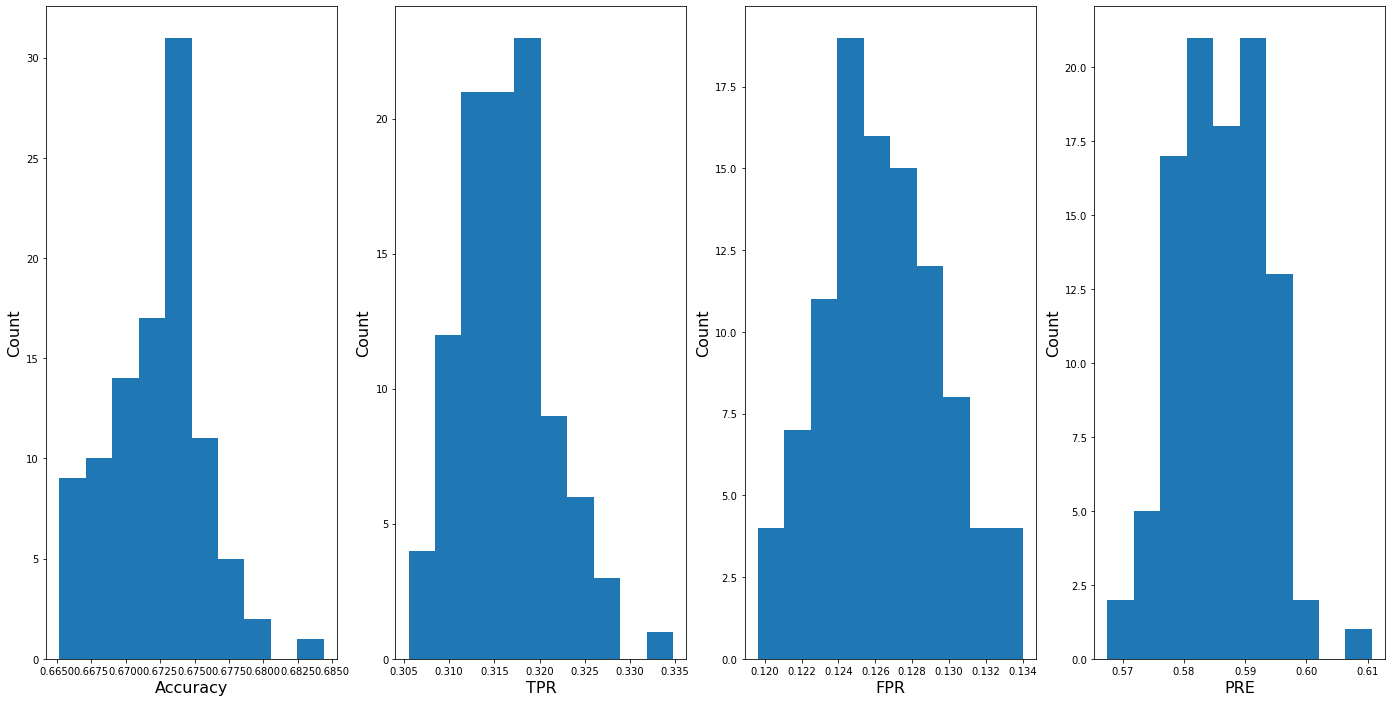

In [253]:
CI_acc = np.quantile(bs_output['Accuracy'],np.array([0.025,0.975]))
CI_TPR = np.quantile(bs_output['TPR'],np.array([0.025,0.975]))
CI_FPR = np.quantile(bs_output['FPR'],np.array([0.025,0.975]))
CI_PRE = np.quantile(bs_output['PRE'],np.array([0.025,0.975]))

fig, axs = plt.subplots(ncols=4, figsize=(24,12))
i = 0
for metric, metric_results in bs_output.items():
    axs[i].hist(metric_results, label = metric)
    axs[i].set_xlabel(metric,fontsize=16)
    axs[i].set_ylabel('Count',fontsize=16)
    i+=1
    
plt.show()

In [254]:
# Let's make a table for this 
bootstrap_data = {'Accuracy':[CI_acc[0],CI_acc[1]],'TPR':[CI_TPR[0],CI_TPR[1]],
                 'FPR':[CI_FPR[0],CI_FPR[1]],'PRE':[CI_PRE[0],CI_PRE[1]]}
bootstrap_table = pd.DataFrame(data = bootstrap_data, index = ['0.025 quantile','0.975 quantile']).transpose()
bootstrap_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
bootstrap_table

,0.025 quantile,0.975 quantile
Accuracy,0.666468,0.678621
TPR,0.307858,0.327134
FPR,0.120805,0.133290
PRE,0.573112,0.597946


**Decision Tree Classifier with CV on DepDelay15**

In [255]:
bs_output = bootstrap_validation(X_test, y_test_delay15, dtc_cv_acc_delay15.best_estimator_)

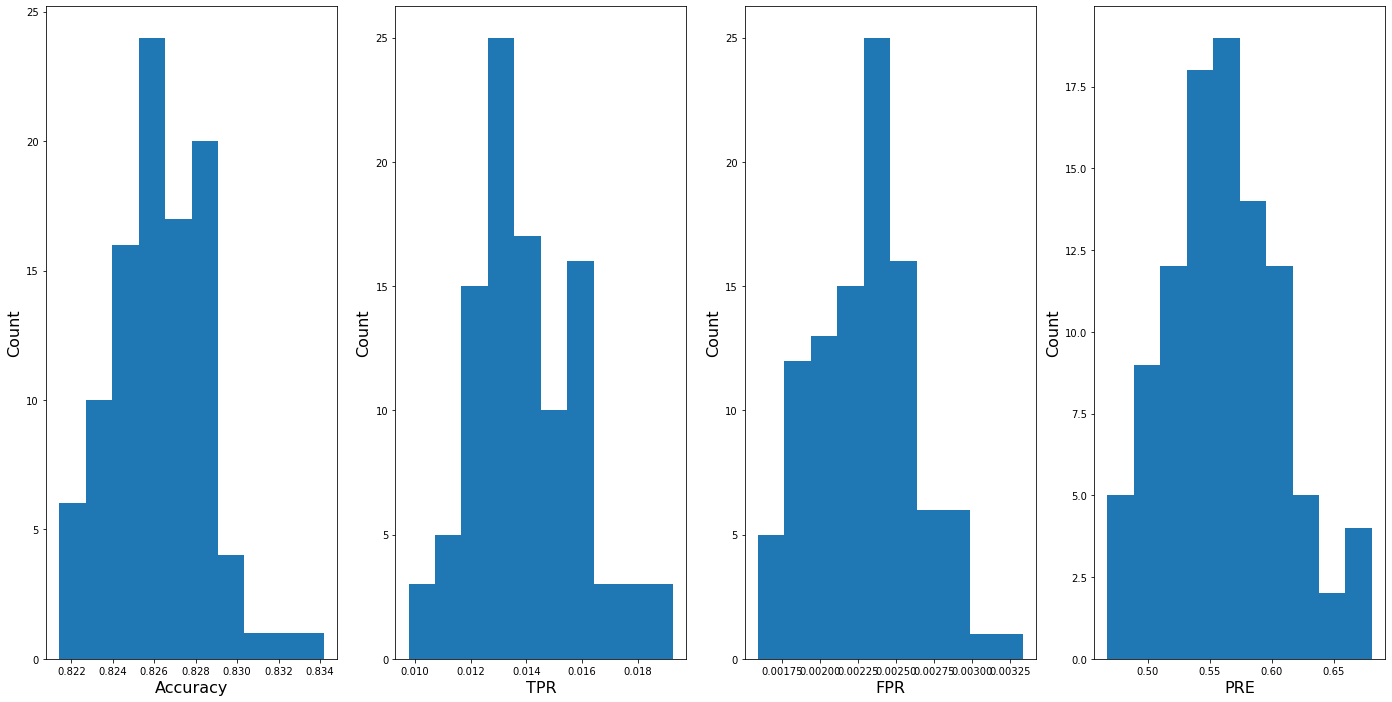

In [256]:
CI_acc = np.quantile(bs_output['Accuracy'],np.array([0.025,0.975]))
CI_TPR = np.quantile(bs_output['TPR'],np.array([0.025,0.975]))
CI_FPR = np.quantile(bs_output['FPR'],np.array([0.025,0.975]))
CI_PRE = np.quantile(bs_output['PRE'],np.array([0.025,0.975]))

fig, axs = plt.subplots(ncols=4, figsize=(24,12))
i = 0
for metric, metric_results in bs_output.items():
    axs[i].hist(metric_results, label = metric)
    axs[i].set_xlabel(metric,fontsize=16)
    axs[i].set_ylabel('Count',fontsize=16)
    i+=1
    
plt.show()

In [257]:
# Let's make a table for this 
bootstrap_data = {'Accuracy':[CI_acc[0],CI_acc[1]],'TPR':[CI_TPR[0],CI_TPR[1]],
                 'FPR':[CI_FPR[0],CI_FPR[1]],'PRE':[CI_PRE[0],CI_PRE[1]]}
bootstrap_table = pd.DataFrame(data = bootstrap_data, index = ['0.025 quantile','0.975 quantile']).transpose()
bootstrap_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
bootstrap_table

,0.025 quantile,0.975 quantile
Accuracy,0.822163,0.830398
TPR,0.010804,0.018343
FPR,0.001643,0.002902
PRE,0.481449,0.673913
